In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [116]:
#Load Data

train_data=pd.read_csv("fraudTrain.csv",sep=",")
test_data=pd.read_csv("fraudTest.csv",sep=",")


In [117]:
#get informations about the dataset

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [118]:
print("Train dataset:")
train_data.head()

Train dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [119]:
print("Test dataset:")
test_data.head()

Test dataset:


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [120]:
#Encode categorical columns:gender

label_encoder = LabelEncoder()
train_data['gender'] = label_encoder.fit_transform(train_data['gender'])
test_data['gender'] = label_encoder.transform(test_data['gender'])

# Use hash function to convert 'trans_num' to numerical values

train_data['trans_num'] = train_data['trans_num'].apply(hash)
test_data['trans_num'] = test_data['trans_num'].apply(hash)


In [121]:
#Data preprocessing

train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])

# Extract features from 'trans_date_trans_time'

train_data['trans_year'] = train_data['trans_date_trans_time'].dt.year
train_data['trans_month'] = train_data['trans_date_trans_time'].dt.month
train_data['trans_day'] = train_data['trans_date_trans_time'].dt.day
train_data['trans_timestamp'] = train_data['trans_date_trans_time'].astype('int64')  
train_data['trans_hour'] = train_data['trans_date_trans_time'].dt.hour
train_data['trans_minute'] = train_data['trans_date_trans_time'].dt.minute

# Apply the same transformations to the test set

test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['trans_year'] = test_data['trans_date_trans_time'].dt.year
test_data['trans_month'] = test_data['trans_date_trans_time'].dt.month
test_data['trans_day'] = test_data['trans_date_trans_time'].dt.day
test_data['trans_timestamp'] = test_data['trans_date_trans_time'].astype('int64') 
test_data['trans_hour'] = test_data['trans_date_trans_time'].dt.hour
test_data['trans_minute'] = test_data['trans_date_trans_time'].dt.minute

In [122]:
# Drop unnecessary columns

new_train_data = train_data.drop(columns=['Unnamed: 0','trans_date_trans_time','category', 'city','first','last','state','street', 'job', 'dob','merchant'])
test_data = test_data.drop(columns=['Unnamed: 0','trans_date_trans_time','category','city','first','last','state','street', 'job', 'dob','merchant'])

In [123]:
print("Trainning dataset after preprocessing:")
new_train_data.head()

Trainning dataset after preprocessing:


,cc_num,amt,gender,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_timestamp,trans_hour,trans_minute
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,8332317959760228462,1325376018,36.011293,-82.048315,0,2019,1,1,1546300818000000000,0,0
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,72361786764441204,1325376044,49.159047,-118.186462,0,2019,1,1,1546300844000000000,0,0
2,38859492057661,220.11,1,83252,42.1808,-112.2620,4154,880607792505634044,1325376051,43.150704,-112.154481,0,2019,1,1,1546300851000000000,0,0
3,3534093764340240,45.00,1,59632,46.2306,-112.1138,1939,-4832610613748385361,1325376076,47.034331,-112.561071,0,2019,1,1,1546300876000000000,0,1
4,375534208663984,41.96,1,24433,38.4207,-79.4629,99,4493104523682229480,1325376186,38.674999,-78.632459,0,2019,1,1,1546300986000000000,0,3


In [124]:
print("Test dataset after preprocessing:")
test_data.head()

Test dataset after preprocessing:


,cc_num,amt,gender,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_timestamp,trans_hour,trans_minute
0,2291163933867244,2.86,1,29209,33.9659,-80.9355,333497,-4134329603481540824,1371816865,33.986391,-81.200714,0,2020,6,21,1592741665000000000,12,14
1,3573030041201292,29.84,0,84002,40.3207,-110.4360,302,8418539887052863240,1371816873,39.450498,-109.960431,0,2020,6,21,1592741673000000000,12,14
2,3598215285024754,41.28,0,11710,40.6729,-73.5365,34496,-6099254868227935162,1371816893,40.495810,-74.196111,0,2020,6,21,1592741693000000000,12,14
3,3591919803438423,60.05,1,32780,28.5697,-80.8191,54767,-854009324972598067,1371816915,28.812398,-80.883061,0,2020,6,21,1592741715000000000,12,15
4,3526826139003047,3.19,1,49632,44.2529,-85.0170,1126,-4011532793927597057,1371816917,44.959148,-85.884734,0,2020,6,21,1592741717000000000,12,15


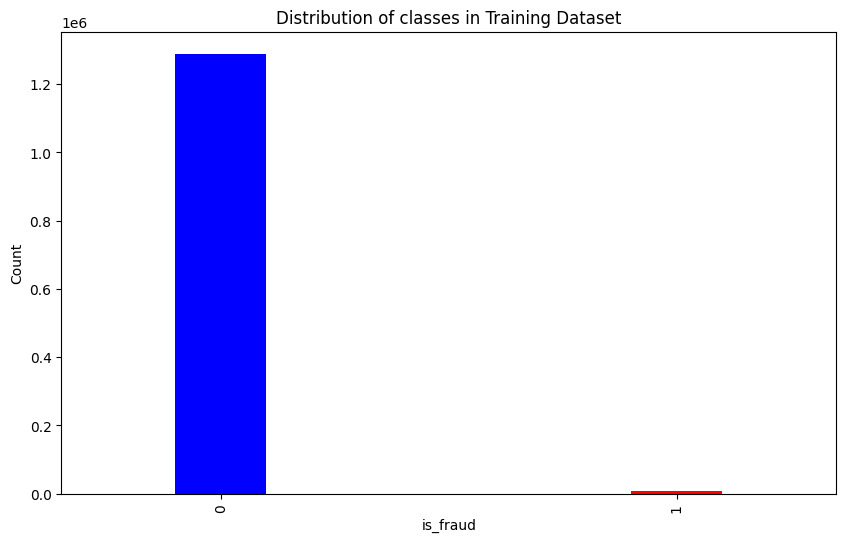

In [125]:
# Visualize Data - Distribution of  classes in Training Dataset

plt.figure(figsize=(10, 6))
new_train_data['is_fraud'].value_counts().plot(kind='bar', color=['blue','red'],width=0.2)
plt.title('Distribution of classes in Training Dataset')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

we have imbalanced distribution of classes in trainning dataset

In [126]:
#shuffle  randomly the rows so that the is_fraud column does not follow a sorted pattern

# new_train_data = new_train_data.sample(frac=0.1, random_state=1)
# test_data = test_data.sample(frac=1, random_state=42)
new_train_data= shuffle(new_train_data,random_state=42).reset_index(drop=True)
# test_data = shuffle(test_data, random_state=42).reset_index(drop=True)

In [127]:
print("Trainning dataset after shuffle:")
new_train_data.head()

Trainning dataset after shuffle:


,cc_num,amt,gender,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_timestamp,trans_hour,trans_minute
0,577588686219,194.51,1,15686,40.6153,-79.4545,972,-9109759917270735955,1362841766,40.420453,-78.865012,0,2020,3,9,1583766566000000000,15,9
1,30376238035123,52.32,0,97476,42.8250,-124.4409,217,-1441121532172097061,1345650541,42.758860,-123.636337,0,2019,8,22,1566488941000000000,15,49
2,4658490815480264,6.53,0,15449,39.9636,-79.7853,184,-8291076876527017995,1330824856,40.475159,-78.898190,0,2019,3,4,1551663256000000000,1,34
3,3514897282719543,7.33,1,14425,42.9580,-77.3083,10717,-2596832945532605544,1371413078,43.767506,-76.542384,0,2020,6,16,1592337878000000000,20,4
4,6011381817520024,64.29,0,82221,41.6423,-104.1974,635,5792510899794745969,1336974888,41.040392,-104.092324,0,2019,5,14,1557813288000000000,5,54


In [128]:
# Split the data into features (X) and target (y)

X_train = new_train_data.drop('is_fraud', axis=1)
y_train = new_train_data['is_fraud']

X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

In [129]:
#use over_sampling to balance the class distribution
X_train,y_train=SMOTE().fit_resample(X_train,y_train)
# X_test,y_test=SMOTE().fit_resample(X_test,y_test)

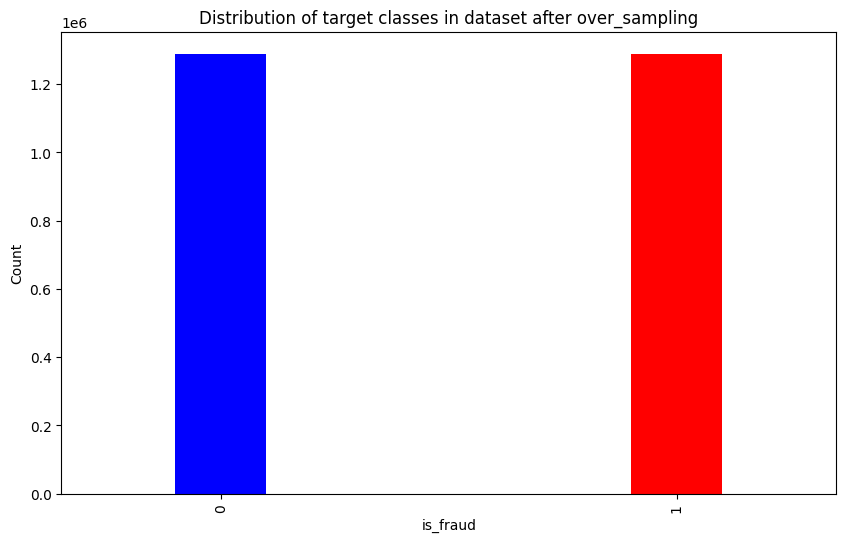

In [130]:
# Visualize Data - Distribution of  target classes in  Dataset afer over_sampling

plt.figure(figsize=(10, 6))
y_train.value_counts().plot(kind='bar', color=['blue','red'],width=0.2)
plt.title('Distribution of target classes in dataset after over_sampling')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

In [131]:
# Create a StandardScaler object
scaler = StandardScaler()

#features scaling
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [132]:
print("Trainning data after scaling:")
print(X_train)

Trainning data after scaling:
[[-0.31626845 -0.3083303   1.35027174 ...  1.09831951  0.24286694
  -1.28709704]
 [-0.3162454  -0.7251689  -0.74059167 ... -0.24827378  0.24286694
   1.24107649]
 [-0.31266566 -0.85940505 -0.74059167 ... -1.40376639 -1.64708215
   0.29301142]
 ...
 [-0.316264   -0.03960211 -0.74059167 ... -0.93481405 -1.78207851
  -0.97107535]
 [-0.31563873 -0.37683113 -0.74059167 ... -1.41728284 -0.97210033
  -0.40223631]
 [-0.31278873  0.10092848 -0.74059167 ...  1.21179812  1.32283784
   1.49389384]]


In [133]:
from sklearn.ensemble import RandomForestClassifier
rdm_model=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42)
rdm_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [135]:
# Make predictions

rdm_predictions = rdm_model.predict(X_test)


# Evaluate the model
print('RandomForestClassifier model:')
rdm_accuracy = accuracy_score(y_test, rdm_predictions)
rdm_precision=precision_score(y_test, rdm_predictions)
rdm_recall=recall_score(y_test, rdm_predictions)
rdm_f1=f1_score(y_test, rdm_predictions)
print("Accuracy:", rdm_accuracy)
print("Precision:", rdm_precision)
print("Recall:", rdm_recall)
print("F1:", rdm_f1)


RandomForestClassifier model:
Accuracy: 0.9713632249392229
Precision: 0.0895486794252668
Recall: 0.7002331002331003
F1: 0.15879056982767734
